In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# The Importance of Feature Scaling

## Startup Dataset

In [2]:
# Read csv into df and trim
df = pd.read_csv('datasets/50_Startups.csv')
df = df.drop(columns = ['State'])
cols = list(df.columns)
df_x = df.iloc[:, :-1]
df_y = df.iloc[:, -1]

In [3]:
# Convert df into ndarray
X_train = df_x.to_numpy()
y_train = df_y.to_numpy()
X_features = cols[:-1]
y_target = cols[-1]
m, n = X_train.shape

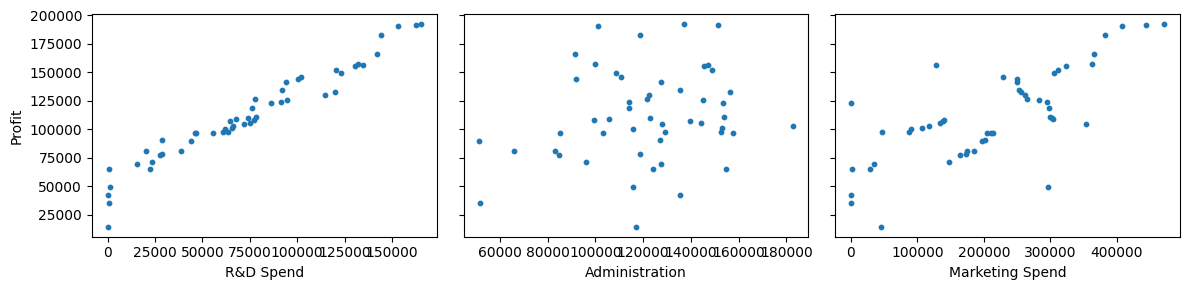

In [4]:
# Visualize training set
fig, ax = plt.subplots(1, n, figsize = (12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, s = 10)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel(y_target)
plt.tight_layout()
plt.savefig('figures/fs_01.png')
plt.show()

## Testing Gradient Descent Algorithm

In [5]:
# Cost Function
def compute_cost(X, y , w, b):
    '''
    :param X: (m, n-1)
    :param y: (m, )
    :param w: (n, )
    :param b: (scalar)
    :return: (scalar) cost at given param and train set
    '''
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        y_hat_i = np.dot(X[i], w) + b
        cost += (y_hat_i - y[i]) ** 2
    cost /= (2*m)
    return cost

In [6]:
# Gradient Function
def compute_gradient(X, y, w, b):
    '''
    :param X: (m, n)
    :param y: (m, 1)
    :param w: (n, )
    :param b: (scalar)
    :return:
        dj_dw: (n, )
        dj_dw: (1, )
    '''
    m, n = X.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.0
    for i in range(m):
        error = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += error * X[i, j]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [7]:
# Gradient Descent Algorithm
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    cost_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost_history.append(cost_function(X,y,w,b))
    return w, b, cost_history

In [8]:
# Parameter Settings
w_in = np.zeros((n, ))
b_in = 0

iter = 1000
alpha = 3.0e-5

In [9]:
# Run Algorithm
w_final, b_final, cost_history = gradient_descent(X_train, y_train, w_in, b_in, compute_cost, compute_gradient, alpha, iter)
print(f"Final parameters b, w: {b_final:0.2f},{w_final} ")

Final parameters b, w: nan,[nan nan nan] 


C:\Users\pdksean\AppData\Local\Temp\ipykernel_20628\1956218608.py:14: RuntimeWarning: overflow encountered in scalar power
  cost += (y_hat_i - y[i]) ** 2
C:\Users\pdksean\AppData\Local\Temp\ipykernel_20628\947115964.py:18: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw[j] += error * X[i, j]


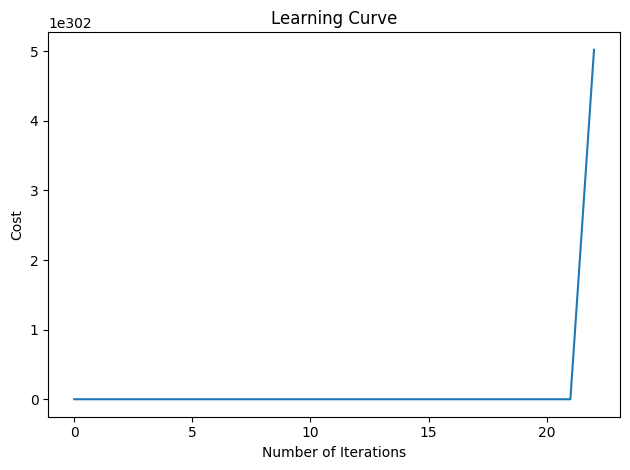

In [10]:
# Plot Learning Curve
plt.plot(cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.tight_layout()
plt.savefig('figures/fs_02.png')
plt.show()

# Feature Scaling

## Startup Dataset for Comparison

## Progress of Feature Scaling

In [11]:
# Z-score Normalization
mu = np.mean(X_train,axis=0)
sigma = np.std(X_train,axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma

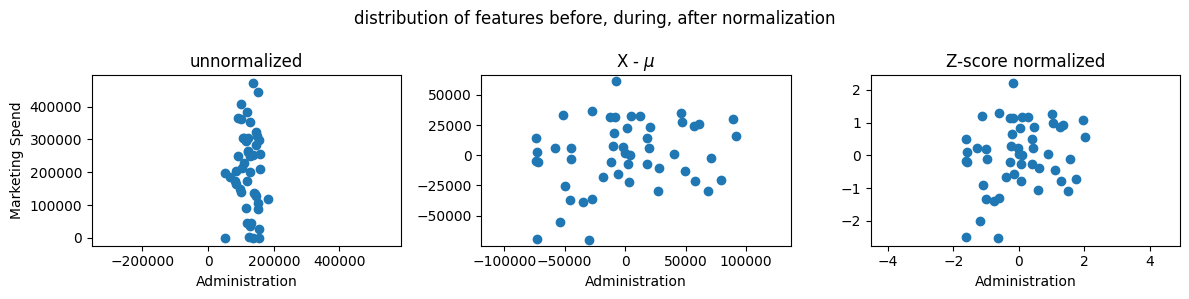

In [12]:
# Progress of Z-score Normalization
fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,1], X_train[:,2])
ax[0].set_xlabel(X_features[1]); ax[0].set_ylabel(X_features[2]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,1])
ax[1].set_xlabel(X_features[1]); ax[0].set_ylabel(X_features[2]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,1])
ax[2].set_xlabel(X_features[1]); ax[0].set_ylabel(X_features[2]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.tight_layout()
plt.savefig('figures/fs_03.png')
plt.show()

## Compare Distribution

In [13]:
# Z-Score Normalization Function
def zscore_fs(X):
    mu = np.mean(X, axis = 0)
    sigma = np.mean(X, axis = 0)
    X_norm = (X-mu) / sigma
    return X_norm, mu, sigma

In [14]:
# Normalize and Check Peak To Peak Change
X_norm, X_mu, X_sigma = zscore_fs(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [ 73721.6156 121344.6396 211025.0978], 
X_sigma = [ 73721.6156 121344.6396 211025.0978]
Peak to Peak range by column in Raw        X:[165349.2  131362.42 471784.1 ]
Peak to Peak range by column in Normalized X:[2.24288628 1.08255643 2.23567767]


In [15]:
# Histogram and Normal Distribution Plot
def plot_histogram_with_normal(ax, data):
    """
    Plot a histogram of the data and a normal distribution curve on the given Axes object.

    Parameters:
    ax (matplotlib.axes.Axes): The Axes object to plot on.
    data (array-like): The 1D array of data to plot.
    """
    # Calculate the mean and standard deviation of the data
    mu, sigma = np.mean(data), np.std(data)

    # Plot the histogram of the data
    ax.hist(data, bins=30, density=True, alpha=0.6, label='Histogram')

    # Plot the normal distribution curve
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    ax.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    return

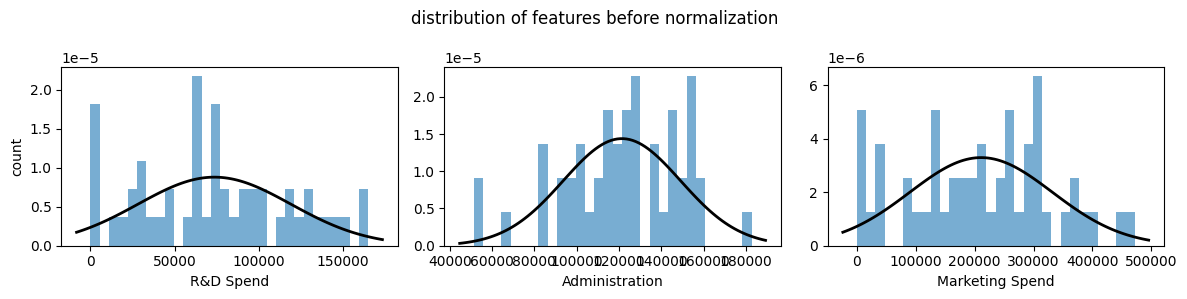

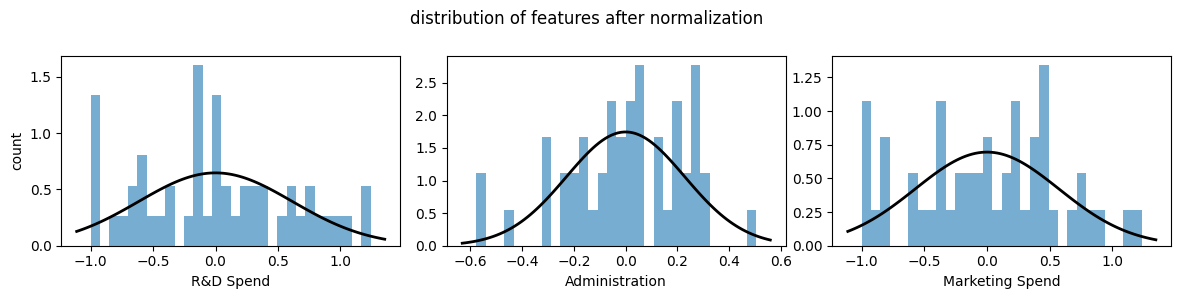

In [16]:
# Plot Comparison of Raw vs Normalized
fig,ax=plt.subplots(1, n, figsize=(12, 3))
for i in range(len(ax)):
    plot_histogram_with_normal(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.tight_layout()
plt.savefig('figures/fs_04_01.png')
plt.show()

fig,ax=plt.subplots(1,n,figsize=(12,3))
for i in range(len(ax)):
    plot_histogram_with_normal(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features after normalization")
plt.tight_layout()
plt.savefig('figures/fs_04_02.png')
plt.show()

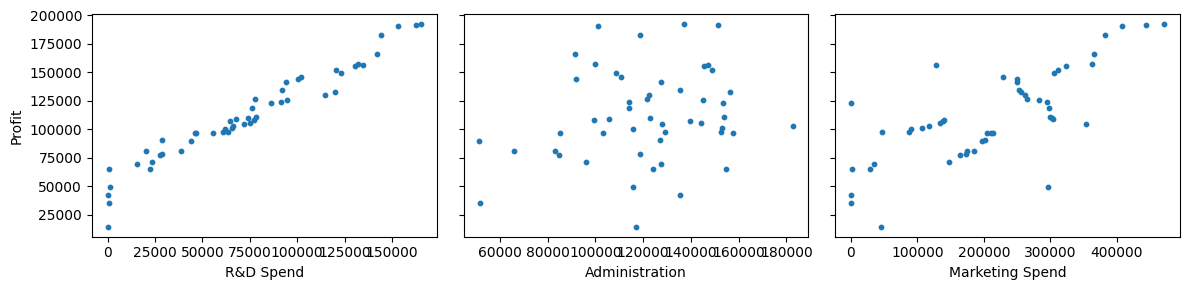

In [17]:
# Visualize training set
fig, ax = plt.subplots(1, n, figsize = (12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, s = 10)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel(y_target)
plt.tight_layout()
plt.savefig('figures/fs_05.png')
plt.show()

## Feature Scaling Implementation

In [18]:
# Run Algorithm for Feature Scaled
w_z, b_z, cost_history_z = gradient_descent(X_norm, y_train, w_in, b_in, compute_cost, compute_gradient, alpha, iter)
print(f"Final parameters b, w: {b_z:0.2f},{w_z} ")

Final parameters b, w: 3310.52,[711.78921213  54.54291684 508.25132118] 


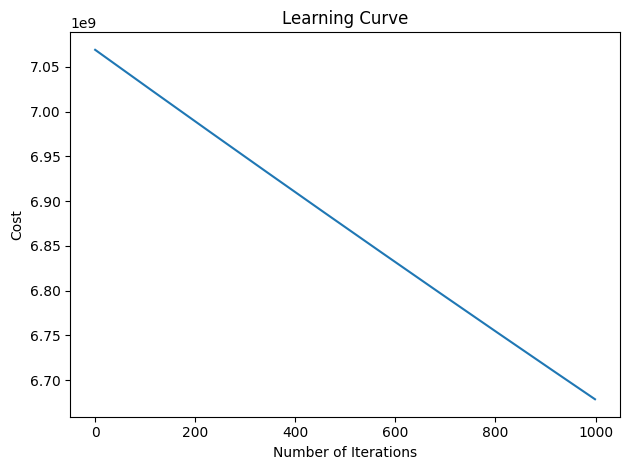

In [19]:
# Plot Learning Curve
plt.plot(cost_history_z)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.tight_layout()
plt.savefig('figures/fs_06.png')
plt.show()

## Symmetricity Comparison

In [20]:
# Prepare Contour Plot
def compute_cost_contour(X, y , w0, w1, w2, b):
    w = np.array([w0, w1, w2])
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        y_hat_i = np.dot(X[i], w) + b
        cost += (y_hat_i - y[i]) ** 2
    cost /= (2*m)
    return cost

def plot_contour(X, y, compute_cost, u_limit, label, file_name, num_points=100):
    w0_vals = np.linspace(-1 * u_limit, u_limit, num_points)
    w1_vals = np.linspace(-1 * u_limit, u_limit, num_points)
    W0, W1 = np.meshgrid(w0_vals, w1_vals)
    Z = np.zeros_like(W0)
    for i in range(num_points):
        for j in range(num_points):
            cost = compute_cost(X, y, W0[i, j], 1, W1[i, j], 0)
            Z[i, j] = cost
            
    # Adjust levels based on the range of computed costs
    min_cost = np.min(Z)
    max_cost = np.max(Z)
    levels = np.linspace(min_cost, max_cost, 30)  # Adjust the number of levels as needed

    plt.figure(figsize=(8, 8))
    plt.contour(W0, W1, Z, levels = levels, cmap = 'plasma')
    plt.xlabel(f'{label} w0')
    plt.ylabel(f'{label} w2')
    plt.title('Contour Plot of Cost Function')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('figures/{}.png'.format(file_name))
    return

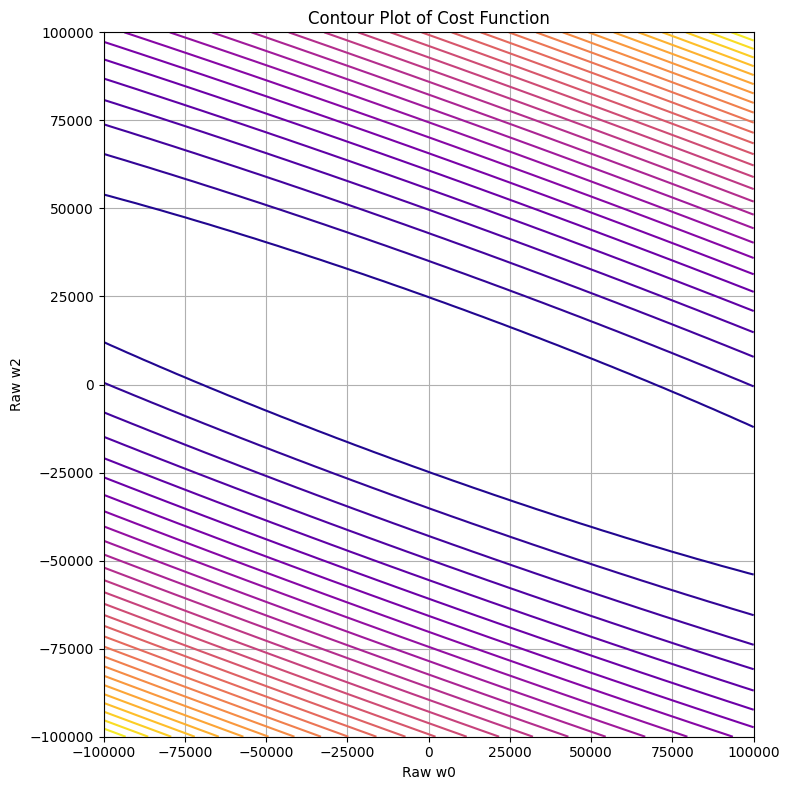

In [21]:
plot_contour(X_train, y_train, compute_cost_contour, 100000, 'Raw', 'fs_07_01')

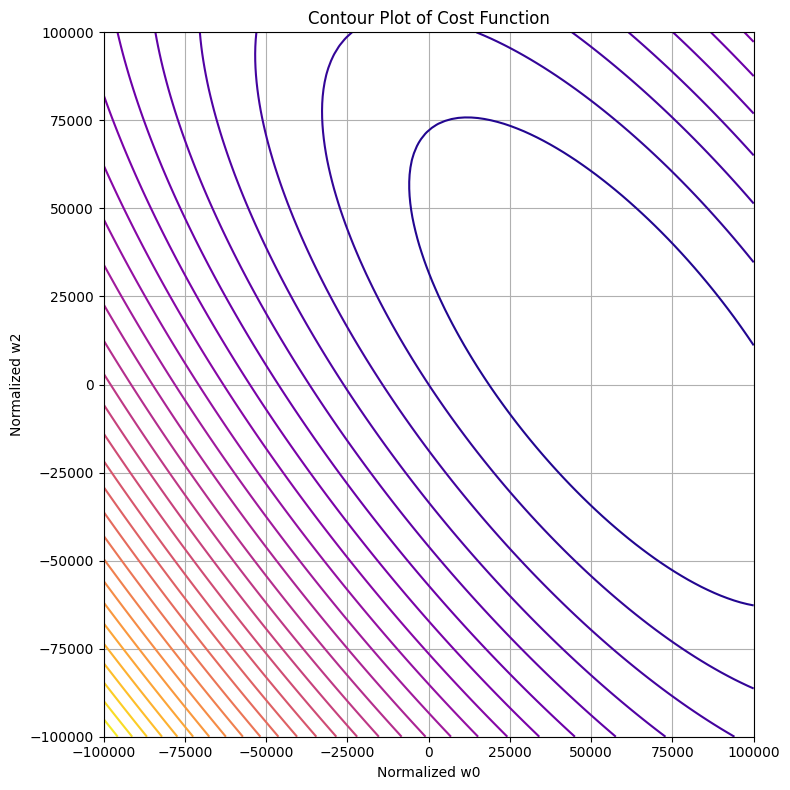

In [22]:
plot_contour(X_norm, y_train, compute_cost_contour, 100000, 'Normalized', 'fs_07_02')